In [3]:
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

%matplotlib inline

In [5]:
def revert_channel(image):
    return image[:,:,::-1]

class COLOR_TYPES(Enum):
    Black = 1
    White = 2
    Gray = 3
    Red = 4
    Orange = 5
    Yellow = 6
    Yellow_Green = 7
    Green = 8
    Green_Cyan = 9
    Cyan = 10
    Cyan_Blue = 11
    Blue = 12
    Violet = 13
    Magenta = 14
    Pink = 15
    
def get_pixel_color_type(h, s, v):

    if v < 75:
        return COLOR_TYPES.Black
    if v > 190 and s < 27:
        return COLOR_TYPES.White
    if s < 53 and v < 185:
        return COLOR_TYPES.Gray
    
    if h <= 10:
        return COLOR_TYPES.Red
    if h <= 50:
        return COLOR_TYPES.Orange
    if h <= 60:
        return COLOR_TYPES.Yellow
    if h <= 80:
        return COLOR_TYPES.Yellow_Green
    if h <= 140:
        return COLOR_TYPES.Green
    if h <= 169:
        return COLOR_TYPES.Green_Cyan
    if h <= 200:
        return COLOR_TYPES.Cyan
    if h <= 220:
        return COLOR_TYPES.Cyan_Blue
    if h <= 240:
        return COLOR_TYPES.Blue
    if h <= 280:
        return COLOR_TYPES.Violet
    if h <= 320:
        return COLOR_TYPES.Magenta
    if h < 355:
        return COLOR_TYPES.Pink
    
    return COLOR_TYPES.Red

In [20]:
def calc_color_in_rect(rect, image):

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV_FULL)
    xmin, ymin, xmax, ymax = rect
#     plt.imshow(hsv)
    colors_count = [0] * len(COLOR_TYPES)
    crop_image = image[ymin: ymax, xmin: xmax]
#     plt.imshow(revert_channel(crop_image))
    h = s = v = 0
    for i in range(ymin, ymax):
        for j in range(xmin, xmax):
            h = hsv[i, j, 0]
            s = hsv[i, j, 1]
            v = hsv[i, j, 2]
            if i == ymax//2 and j == xmax//2:
                print(h,s,v)
                
            color_type = get_pixel_color_type(h, s, v)
            colors_count[color_type.value] += 1
    
    max_idx = np.argmax(np.asarray(colors_count))
    print(COLOR_TYPES(max_idx).name)
    

(17, 16, 3)
(0, 0, 16, 17)
248 255 255
Violet


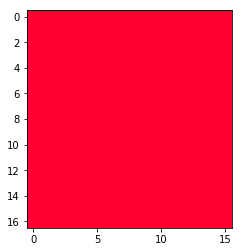

In [25]:
image_path = 'example/red.png'
image = cv2.imread(image_path)
print(image.shape)
i_h, i_w = image.shape[:2]
rect = (0, 0, i_w, i_h) #(xmin, ymin, xmax, ymax)
print(rect)
xmin, ymin, xmax, ymax = rect
# copy_image = image.copy()
# cv2.rectangle(copy_image,(xmin,ymin),(xmax,ymax),(0,255,0),3)
plt.imshow(revert_channel(image))
calc_color_in_rect(rect, image)